# Descripció de la pràctica

A continuació es mostren tots els continguts que s'evaluaran en la pràctica:

1. EDA (exploratory data analysis) (1 punts):
  * Analisi de tamany i tipologia de dades (0.25 pt)
  * Primera valoració de correlacions (0.5 pt)
  * Anàlisi atribut target (0.25 pt)
2. Preprocessing (2 punts):
  * Eliminació de nans (0.5 punts)
  * Encoding de categòriques (0.75 punts)
  * Altres (PCA, normalització..)
3. Metric selection (1.5 punts):
  * Selecció de la millor mètrica pel problema (0.75 punts)
  * Visualització de ROC/AUC (0.75 punts)
4. Model Selection amb Crossvalidation (4 punts):
  * Selecció del millor model (2 punts)
  * Búsqueda hiperparàmetres (2 punts)
5. Anàlisi final (1.5 punt)

Cal dir que, les puntuacions dins de cada apartat son orientatives. La pràctica esta construida a partir d'un seguit de preguntes orientatives en cada apartat les quals tenen relació amb els continguts evaluables. **NO cal contestar-les totes**. Són una guia per a que reflexioneu i aprengueu detalls de cada apartat. És recomanable, això sí, llegir totes les preguntes abans de realitzar la pràctica i tenir-les en ment alhora d'executar-la.


**IMPORTANT**: El que es valorarà en la pràctica és la capacitat de mantenir una narrativa coherent alhora que es realitzen els resultats. No es mirarà tant que alguna pregunta quedi per respondre sinó que els passos seguits en base als resultats obtinguts siguin coherents.

### 1. EDA (exploratory data analysis) (1 punt)

Abans de res cal sempre veure com és la base de dades asignada?

**Preguntes:**
* Quants atributs té la vostra base de dades?
* Quin tipus d'atributs tens? (Númerics, temporals, categòrics, binaris...)
* Com és el target, quantes categories diferents existeixen?
* Tenim nans en les dades?
* Podeu veure alguna correlació entre X i y?
* Estan balancejades les etiquetes (distribució similar entre categories)? Creus que pot afectar a la classificació la seva distribució?

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train_dataset = 'train_titanic.csv'
train_df = pd.read_csv(train_dataset)

In [ ]:
# Quants atributs té la vostra base de dades?
num_attributes = train_df.shape[1] # El nombre de columnes serà el nombre d'atributs
print("Nombre d'atributs:", num_attributes)

num_data = train_df.shape[0] # Mirem també la llargada del dataset
print("Nombre de mostres", num_data)

Nombre d'atributs: 12
Nombre de mostres 891


In [ ]:
# Per fer-nos una idea dels atributs i de com és el dataset, veiem una mostra de les primeres 5 files.
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Quin tipus d'atributs tens? (Numèrics, temporals, categòrics, binaris...)
attribute_types = train_df.dtypes
print(attribute_types)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object



* **PassengerId** [*Numeric (int64)*]: És una variable numèrica i única. Cada passatger, és a dir, cada fila, té un valor diferent. Així que, molt probablement, no ens aportarà informació útil pel model.

* **Survived** [*Numeric (int64)*]: És una variable binària, indica si el passatger ha sobreviscut (1) o no (0). Aquest és el nostre objectiu a predir, anomenada també columna de destinació.

* **Pclass** [*Numeric (int64)*]: És una variable categòrica que s'ha codificat com a numèrica. Indica la classe del bitllet del passatger (1a, 2a o 3a classe).

* **Name** [*Object*]: És una variable categòrica i de text. Indica el nom del passatger, molt probablement tots seran diferents també i no seran útils pel nostre model.

* **Sex** [*Object*]: És una variable categòrica. Indica el sexe del passatger (Home o Dona).

* **Age** [*Float64*]: És una variable numèrica contínua. Indica l'edat del passatger.

* **SibSp** [*Numeric (int64)*]: És una variable numèrica discreta. Indica el nombre de germans i parella a bord.

* **Parch** [*Numeric (int64)*]: És una variable numèrica discreta. Indica el nombre de pares i fills a bord.

* **Ticket** [*Object*]: És una variable categòrica i de text. Indica el número de bitllet. Probablement tots són diferents i no ens seran útils per l'entrenament del model.

* **Fare** [*Float64*]: Aquesta és una variable numèrica contínua. Indica la tarifa pagada pel bitllet.

* **Cabin** [*Object*]: Aquesta és una variable categòrica i de text. Indica el número de cabina.

* **Embarked** [*Object*]: Aquesta és una variable categòrica. Indica el port d'embarcament (poden ser: C = Cherbourg; Q = Queenstown; S = Southampton).

In [ ]:
# Com és el target, quantes categories diferents existeixen?
unique_target_categories = train_df['Survived'].nunique()
print("Categories úniques: ", unique_target_categories)

print("El target d'aquest dataset és l'atribut 'Survived', aquest ens indica si el passatger va sobreviure o no.")
print("Aquest atribut és un boolea, pel que té dues categories, 0 i 1.")
print("Si survived = 0, indica que el passatger no va sobreviure, si survived = 1, indica que va sobreviure.")


Categories úniques:  2
El target d'aquest dataset és l'atribut 'Survived', aquest ens indica si el passatger va sobreviure o no.
Aquest atribut és un boolea, pel que té dues categories, 0 i 1.
Si survived = 0, indica que el passatger no va sobreviure, si survived = 1, indica que va sobreviure.


In [ ]:
# Tenim nans en les dades?
numberNans = train_df.isna().sum().sum()
print("Nombre de NaNs totals: ", numberNans)
print()

hasNan = train_df.isna().sum()
print("Nombre de NaNs per cada categoria:")
print(hasNan)

Nombre de NaNs totals:  866

Nombre de NaNs per cada categoria:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
#Podeu veure alguna correlació entre X i y?
#Veiem la matriu de correlació de manera "bruta".
correlation_matrix = train_df.corr()
print(correlation_matrix)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


<ipython-input-8-ece2437ae355>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_df.corr()


<ipython-input-9-7b4508712823>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_df.corr()


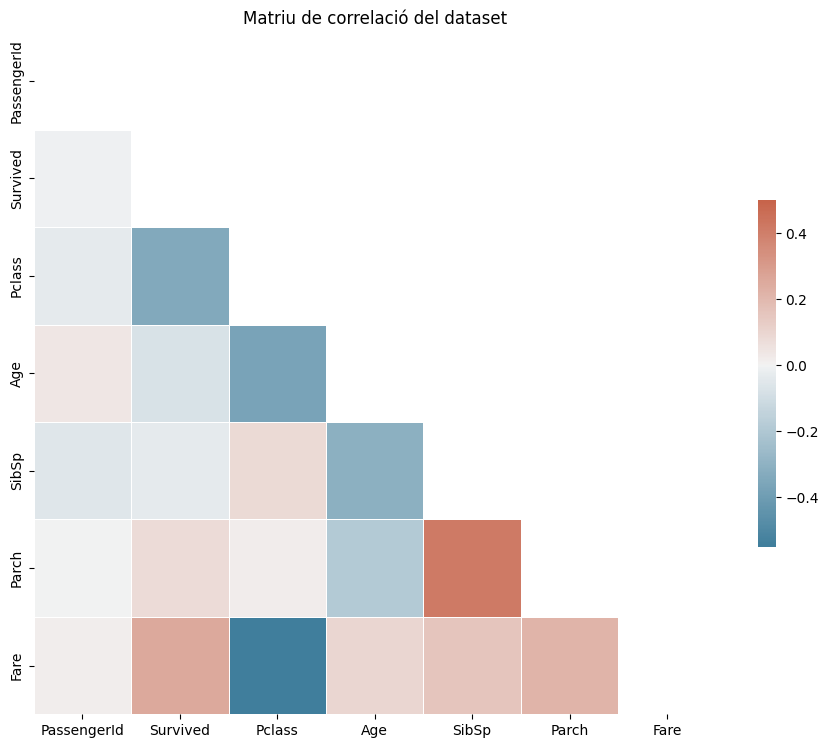

In [ ]:
# Podeu veure alguna correlació entre X i y?
# Anem a veure-ho ara més visualment, explicat pas a pas:

# 1. Creem la matriu de correlacions:
correlation_matrix = train_df.corr()

# 2. Agafem només el triangle inferior de la matriu, ja que les dades són duplicades a les superiors.
# La correlació entre 'Parch' i 'Fare' serà la mateixa que entre 'Fare' i 'Parch'. I així per totes les parelles d'atributs.
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# 3. Posem una paleta de colors de 'heatmap' de blau a vermell.
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# 4. Inicialitzem la figura del plot.
plt.figure(figsize=(11, 9))

# 5. Fem el print del 'heatmap' amb els colors del 'mask' i els valors de la 'correlation_matrix'.
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.5, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# 6. Posem títol al plot.
plt.title('Matriu de correlació del dataset')

# 7. Mostrem el plot.
plt.show()

Veiem que les parelles d'atributs més correlacionats entre ells són el `Fare` i el `Pclass` amb una correlació inversa. I els atributs `Parch` i el `SibSp` amb una correlació directa.

Això està bé, però en realitat no ens interessa gaire. El que volem veure i és imporant de veritat és saber si hi ha alguna correlació important amb l'atribut predit `Survived`. Observem que els atributs amb més correlació amb aquest són `Pclass` i `Fare`.

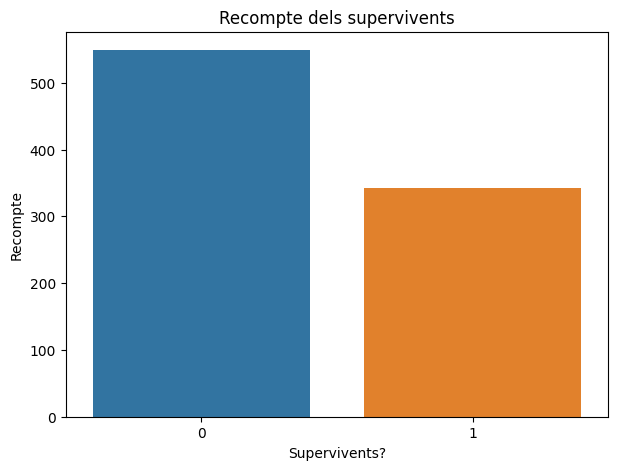

In [ ]:
# Estan balancejades les etiquetes (distribució similar entre categories)?

# Contem el nombre de 0 i de 1. Pas a pas:

# 1. Contem quants 0 i 1 hi ha a la columna objectiu 'Survived'.
label_counts = train_df['Survived'].value_counts()

# 2. Inicialitzem la figura del plot.
plt.figure(figsize=(7, 5))

# 3. Posem les variables que volem mostrar al barplot.
sns.barplot(x=label_counts.index, y=label_counts.values)

# 4. Posem títol al plot i als eixos 'x' i 'y'.
plt.title('Recompte dels supervivents')
plt.xlabel('Supervivents?')
plt.ylabel('Recompte')

# 5. Mostrem el plot.
plt.show()

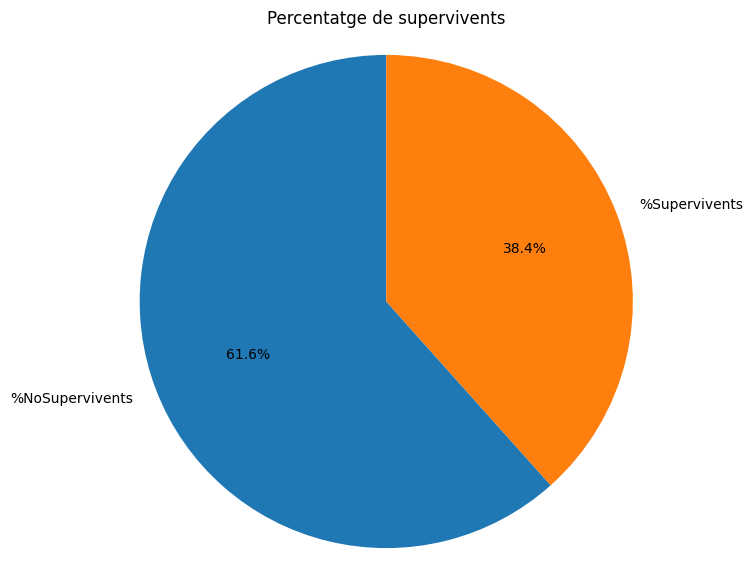

In [ ]:
# Ara contem el percentatge de 0 i 1. Pas a pas:

# 1. Contem el percentatge de 0 i 1.
# Amb el (normalize=True) el nombre de 0 i 1 contats és un valor entre 0 i 1.
# Això multiplicat per 100 ens dona un percentatge.
label_percentage = train_df['Survived'].value_counts(normalize=True) * 100

# 2. Inicialitzem la figura del plot.
plt.figure(figsize=(7, 7))

# 3. Posem les dues variables que volem mostrar al gràfic circular.
plt.pie(label_percentage, labels=['%NoSupervivents', '%Supervivents'], autopct='%1.1f%%', startangle=90)

# 4. Posem títol al plot.
plt.title('Percentatge de supervivents')

# 5. Amb la següent línia ens assegurem que el gràfic circular sigui una circumferència i no una elipse.
plt.axis('equal')

# 6. Mostrem el plot.
plt.show()

#### Creus que pot afectar a la classificació la seva distribució?

Podem veure que hi ha un desequilibri tot i no ser molt elevat. El 61.6% de les dades són de persones que no van sobreviure.

Hem de tenir en compte que hi ha un desequilibri moderat alhora d'aplicar models en el futur, ja que podria estar donant-nos un alt accurancy de manera errònea.

### 2. Preprocessing (normalitzation, outlier removal, feature selection..) (2 punts)
Un cop vistes les dades de les que es disposa, cal preparar les dades per als nostres algoritmes. Segons la tipologia de dades, es poden filtrar atributs, aplicar-hi reductors de dimensionalitat, codificar categories textuals en valors numèrics, normalitzar les dades, treure outliers...

Navegueu per la [documentació de sklearn sobre preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html) per tal de trobar les diferents opcions que proporciona sklearn.

**Preguntes:**
* Estan les dades normalitzades? Caldria fer-ho?
* En cas que les normalitzeu, quin tipus de normalització será més adient per les vostres dades?
* Teniu gaires dades sense informació (nans)? Tingueu en compte que hi ha mètodes que no els toleren durant el aprenentatge. Com afecta a la classificació si les filtrem? I si les reompliu? Com ho farieu? [Pista](https://scikit-learn.org/stable/modules/impute.html)
* Teniu dades categòriques? Quina seria la codificació amb més sentit?
* Podreu treure algun atribut extra de les categòriques (per exemple, aplicant alguna regla sobre el text)?
* Caldria aplicar PCA? Quins beneficis o inconvenients trobarieu?
* Caldria aplicar alguna tècnica de selecció de features? Ho trobeu necessari?
* Es poden aplicar PolynomialFeatures per millorar la classificació? En quins models té sentit fer-ho?

Primer de tot treiem les dades que segur no tenen cap tipus de rellevància i en cas de les numèriques, si el model les té en compte ens estaria empitjorant el model. Aquestes són el `PassengerId`, `Ticket` i el `Name`.

In [ ]:
# Eliminem les columnes que no són rellevants pel model.
train_df = train_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

**Normalització de les dades:**

In [ ]:
# Mirem el resum de les dades.
summary_df = train_df.describe()
summary_df

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


En aquest gràfic veiem evidentment que les dades no estan normalitzades, ja que tenen diferents escales i distribucions. Això podria suposar un problema quan utilitzem algorismes com, per exemple, el knn.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Seleccionem les columnes numèriques per normalitzar.
numerical_cols = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']

# Normalitzem les dades.
scaler = StandardScaler()
train_df_normalized = train_df.copy()
train_df_normalized[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])

# Veiem com s'han normalitzat les dades.
train_df_normalized.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,0.827377,male,-0.530377,0.432793,-0.473674,-0.502445,NaN,S
1,1,-1.566107,female,0.571831,0.432793,-0.473674,0.786845,C85,C
2,1,0.827377,female,-0.254825,-0.474545,-0.473674,-0.488854,NaN,S
3,1,-1.566107,female,0.365167,0.432793,-0.473674,0.420730,C123,S
4,0,0.827377,male,0.365167,-0.474545,-0.473674,-0.486337,NaN,S


Veiem que hem cambiat el rang de les dades, ja que ara estan normalitzades; però no hem cambiat la seva distribució, tal i com ens interesa.

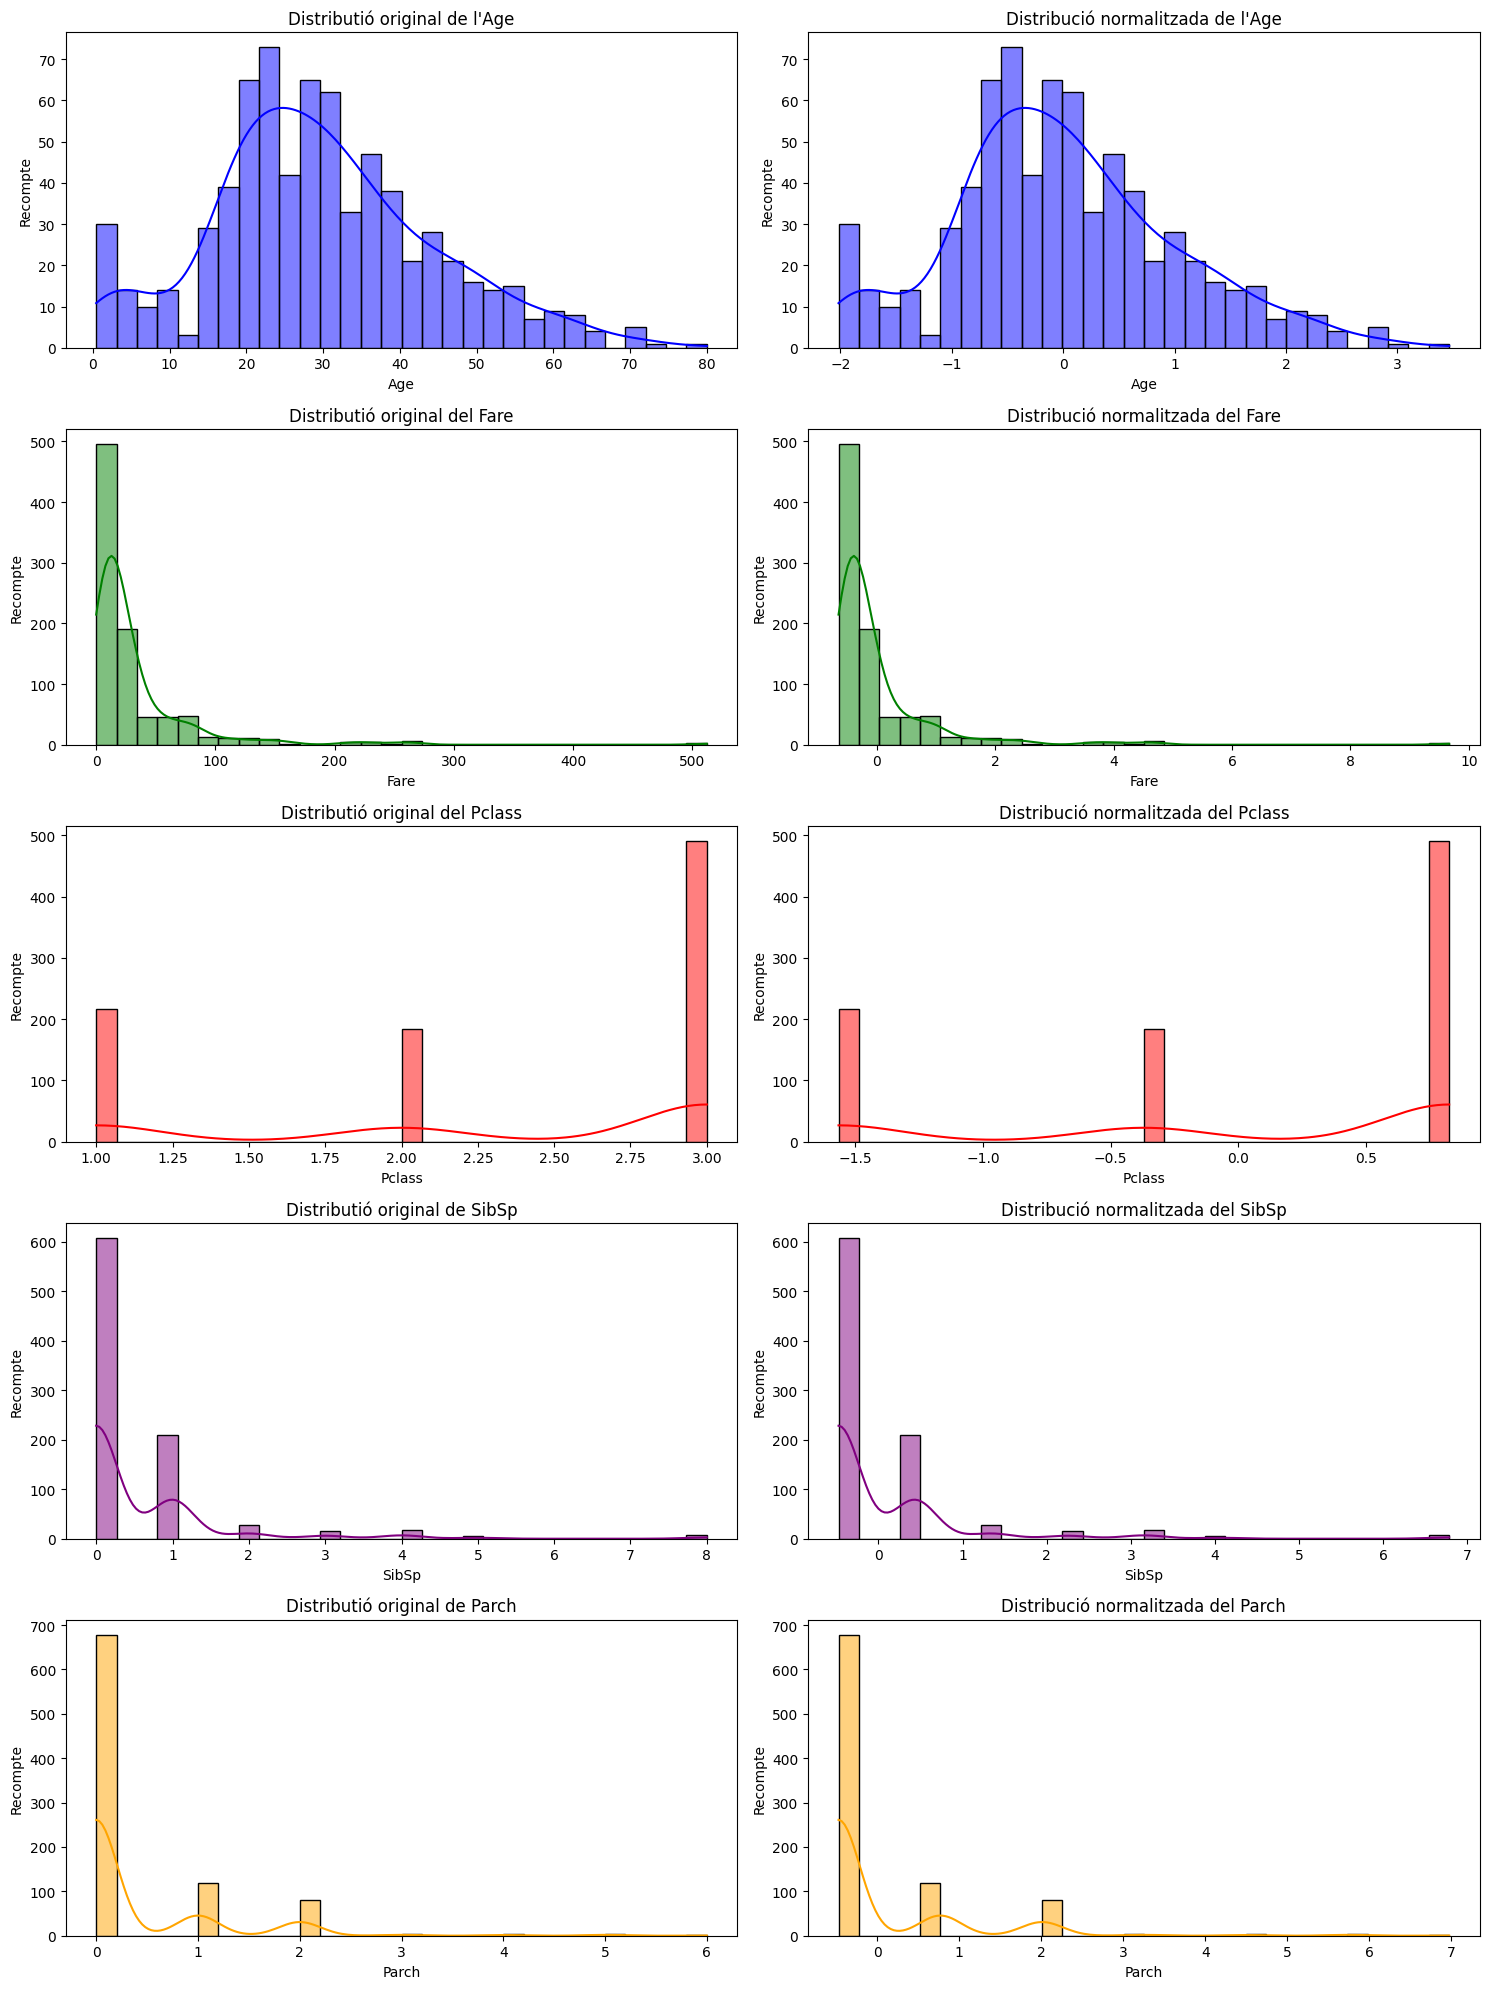

In [ ]:
# Creem plots per comprobar que no hem canviat la distribució però sí que les dades estan normalitzades.
fig, axes = plt.subplots(5, 2, figsize=(15, 20))

# Plot per 'Age'
sns.histplot(train_df['Age'].dropna(), bins=30, kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title("Distributió original de l'Age")
axes[0, 0].set_ylabel("Recompte")

sns.histplot(train_df_normalized['Age'], bins=30, kde=True, ax=axes[0, 1], color='blue')
axes[0, 1].set_title("Distribució normalitzada de l'Age")
axes[0, 1].set_ylabel("Recompte")

# Plot per 'Fare'
sns.histplot(train_df['Fare'], bins=30, kde=True, ax=axes[1, 0], color='green')
axes[1, 0].set_title('Distributió original del Fare')
axes[1, 0].set_ylabel("Recompte")

sns.histplot(train_df_normalized['Fare'], bins=30, kde=True, ax=axes[1, 1], color='green')
axes[1, 1].set_title('Distribució normalitzada del Fare')
axes[1, 1].set_ylabel("Recompte")

# Plot per 'Pclass'
sns.histplot(train_df['Pclass'], bins=30, kde=True, ax=axes[2, 0], color='red')
axes[2, 0].set_title('Distributió original del Pclass')
axes[2, 0].set_ylabel("Recompte")

sns.histplot(train_df_normalized['Pclass'], bins=30, kde=True, ax=axes[2, 1], color='red')
axes[2, 1].set_title('Distribució normalitzada del Pclass')
axes[2, 1].set_ylabel("Recompte")

# Plot per 'SibSp'
sns.histplot(train_df['SibSp'], bins=30, kde=True, ax=axes[3, 0], color='purple')
axes[3, 0].set_title('Distributió original de SibSp')
axes[3, 0].set_ylabel("Recompte")

sns.histplot(train_df_normalized['SibSp'], bins=30, kde=True, ax=axes[3, 1], color='purple')
axes[3, 1].set_title('Distribució normalitzada del SibSp')
axes[3, 1].set_ylabel("Recompte")

# Plot per 'Parch'
sns.histplot(train_df['Parch'], bins=30, kde=True, ax=axes[4, 0], color='orange')
axes[4, 0].set_title('Distributió original de Parch')
axes[4, 0].set_ylabel("Recompte")

sns.histplot(train_df_normalized['Parch'], bins=30, kde=True, ax=axes[4, 1], color='orange')
axes[4, 1].set_title('Distribució normalitzada del Parch')
axes[4, 1].set_ylabel("Recompte")


plt.tight_layout()
plt.show()


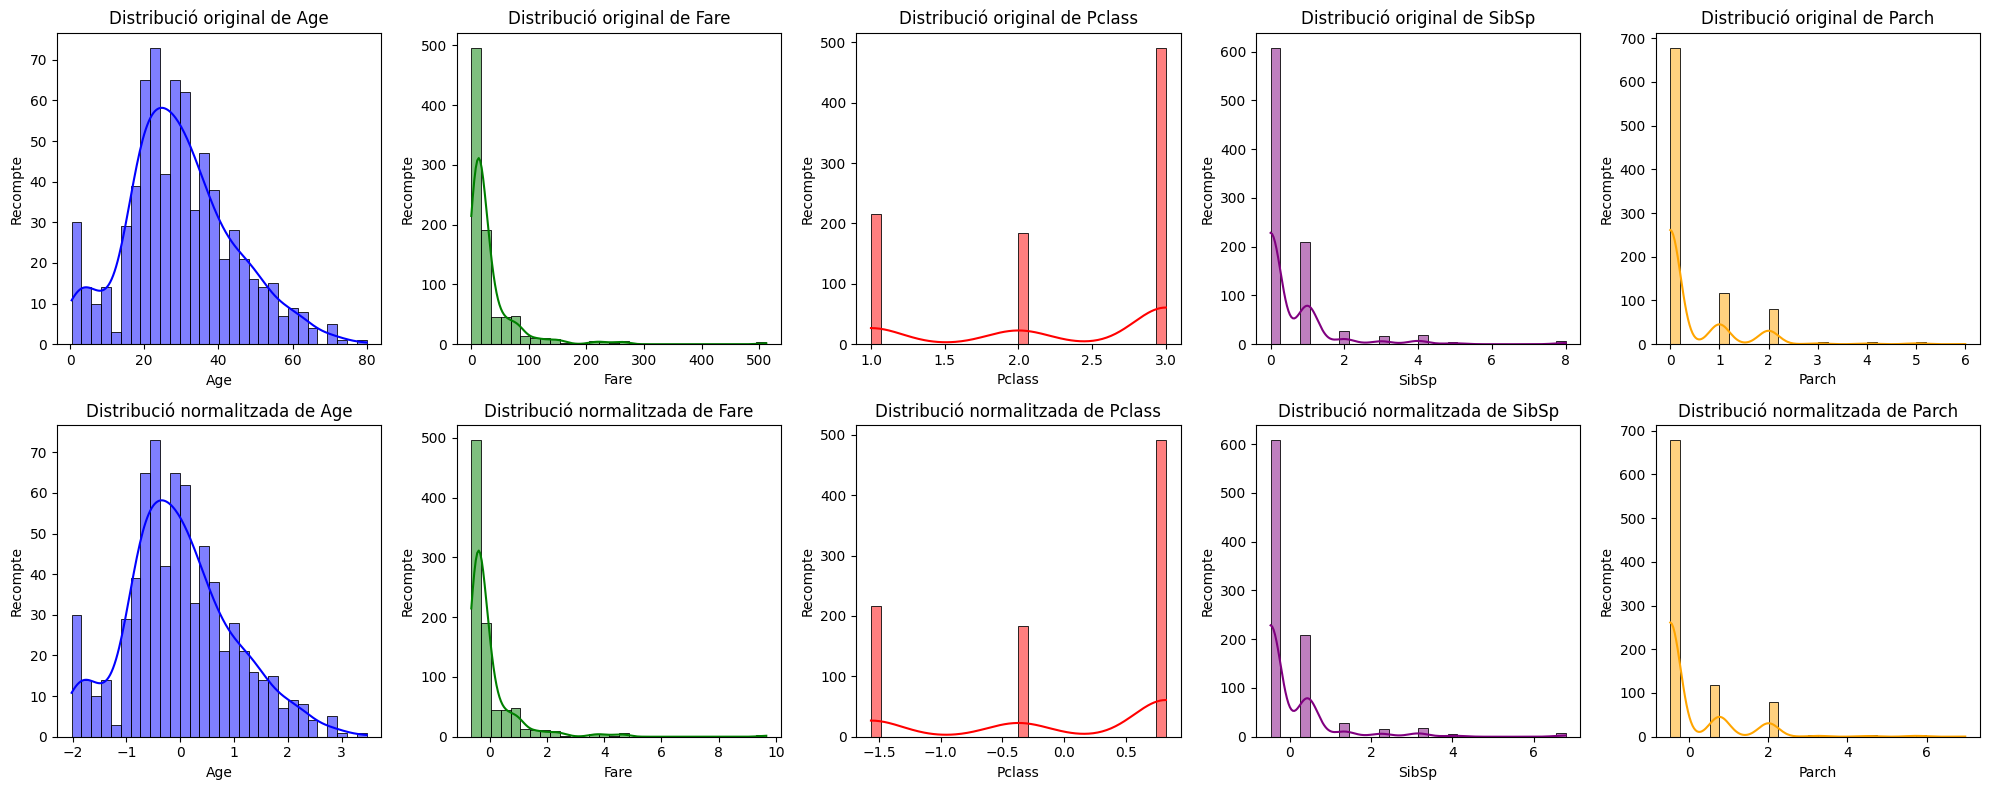

In [ ]:
# Creating a plot with more subplots per row to fit into a smaller area (useful for presentations like PowerPoint)
fig, axes = plt.subplots(2, 5, figsize=(20, 8))

# List of features and their corresponding colors
features = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Looping through each feature to create the plots
for i, (feature, color) in enumerate(zip(features, colors)):
    # Original distribution
    sns.histplot(train_df[feature].dropna(), bins=30, kde=True, ax=axes[0, i], color=color)
    axes[0, i].set_title(f"Distribució original de {feature}")
    axes[0, i].set_ylabel("Recompte")

    # Normalized distribution
    sns.histplot(train_df_normalized[feature], bins=30, kde=True, ax=axes[1, i], color=color)
    axes[1, i].set_title(f"Distribució normalitzada de {feature}")
    axes[1, i].set_ylabel("Recompte")

plt.tight_layout()
plt.show()


Com hem vist, verifiquem que tot i cambiar el rang de les dades, la distribució segueix sent la mateixa.

Comptem quantes dades tenen algun Nan i mirem quines són:



In [ ]:
nan_data = train_df[pd.isnull(train_df).any(axis=1)]
print(nan_data.shape[0])

708


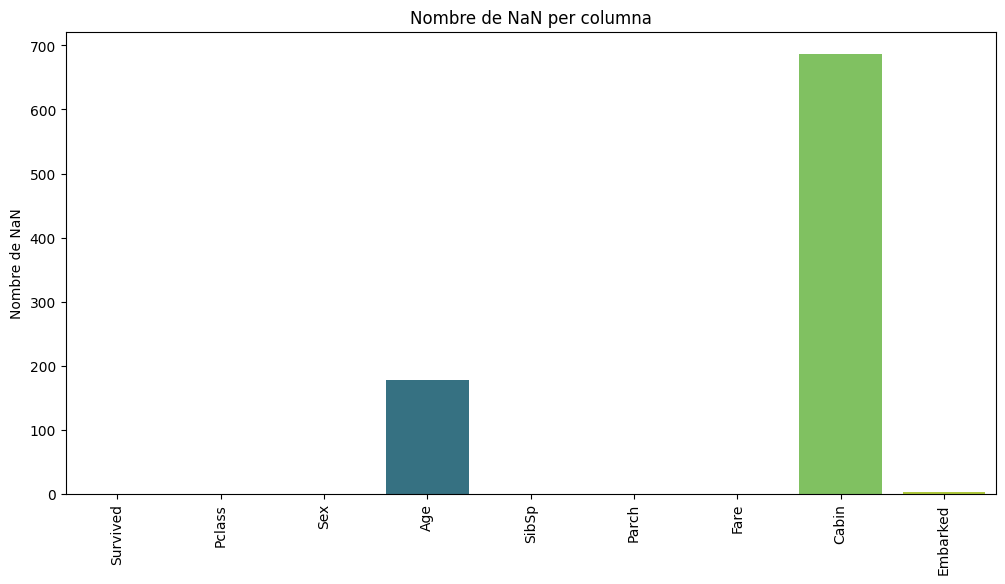

In [ ]:
nan_count = train_df.isna().sum()

# Veiem la distribució de nans a les dades
plt.figure(figsize=(12, 6))
sns.barplot(x=nan_count.index, y=nan_count.values, palette='viridis')
plt.xticks(rotation=90)
plt.ylabel('Nombre de NaN')
plt.title('Nombre de NaN per columna')
plt.show()

Tal i com veiem, gairebé tots els Nan son de la columna cabina, una dada categòrica la qual no tindria per què tenir molta rellevància per predir si s'ha sobreviscut o no, a més és una dada molt difícil de reomplir, doncs no tindria cap tipus de sentit fer una estimació. A més, incloure'l ens podria portar a l'overfitting. Tot i això anem a investigar el per què d'aquests Nan.

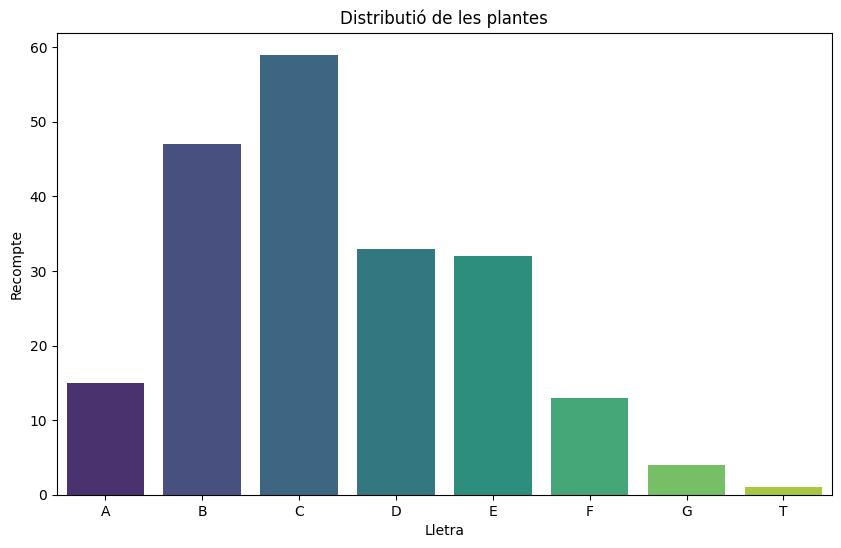

In [ ]:
df_cabin_not_null = train_df[train_df['Cabin'].notna()].copy()

# Agafem la lletra de cada cabina i comptem quantes hi ha per planta que tinguem dades
df_cabin_not_null['Deck'] = df_cabin_not_null['Cabin'].apply(lambda x: x[0])

plt.figure(figsize=(10, 6))
sns.countplot(x='Deck', data=df_cabin_not_null, palette='viridis', order=sorted(df_cabin_not_null['Deck'].unique()))
plt.xlabel('Lletra')
plt.ylabel('Recompte')
plt.title('Distributió de les plantes')
plt.show()


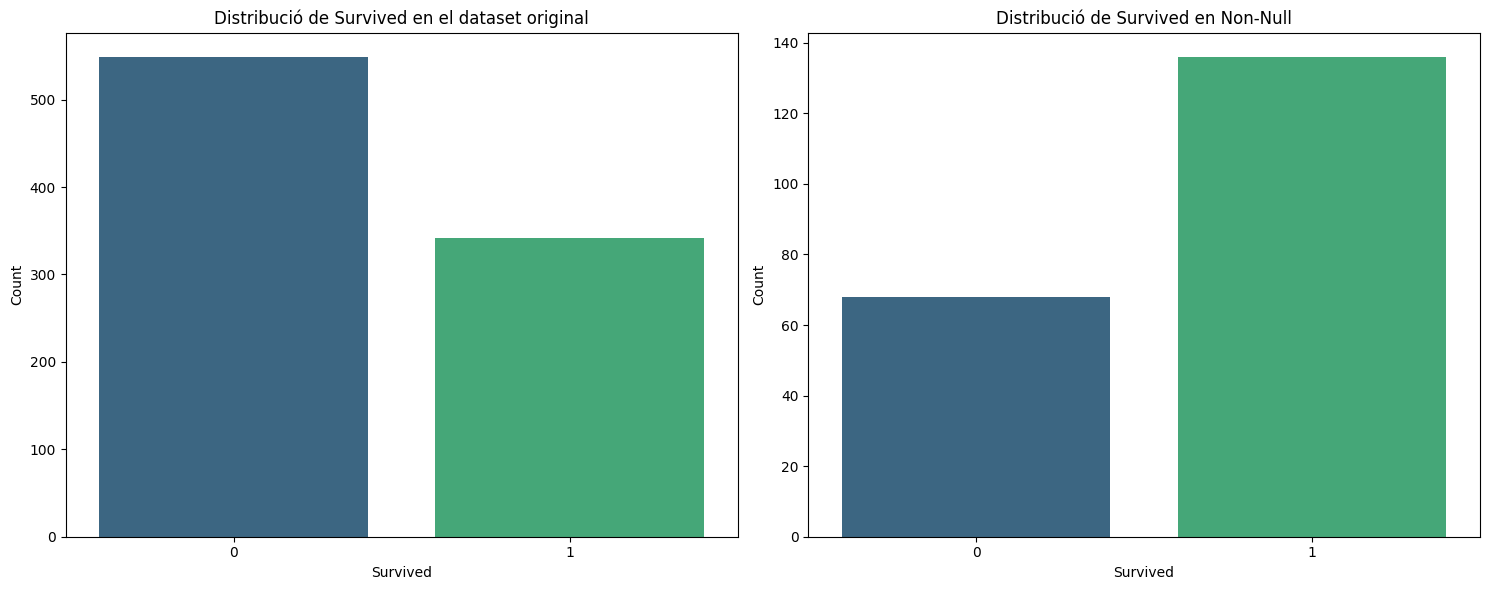

In [ ]:
# Fem plot de la distribució de 'Survived' en el train dataset i en el subset en dades de només les fileres que tenen valors en 'Cabin'
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot del train_dataset
sns.countplot(x='Survived', data=train_df, palette='viridis', ax=axes[0])
axes[0].set_title('Distribució de Survived en el dataset original')
axes[0].set_xlabel('Survived')
axes[0].set_ylabel('Count')

# Plot del Non-Null cabin dataset
sns.countplot(x='Survived', data=df_cabin_not_null, palette='viridis', ax=axes[1])
axes[1].set_title('Distribució de Survived en Non-Null')
axes[1].set_xlabel('Survived')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

Primer de tot veiem com el número de cabina que teniem dels sobreviscuts és molt més conegut que el nombre de cabina en general del dataset. És de sentit comú que tenim més dades de nombre de cabina de passatgers que han sobreviscut que de passatgers que no. Si mirem la ditribució de les classes entre les dades de les quals tenim informació de cabina podem veure clarament que això està correlacionat amb el tipus de classe. Així que no l'usarem per tal de no provocar overfitting.

Aquí veiem com hi ha molts més survived en passatgers dels quals coneixem el nombre de cabina, essent aquest número el doble que els de not survived, quan al dataset original aquest és bastant més alt.

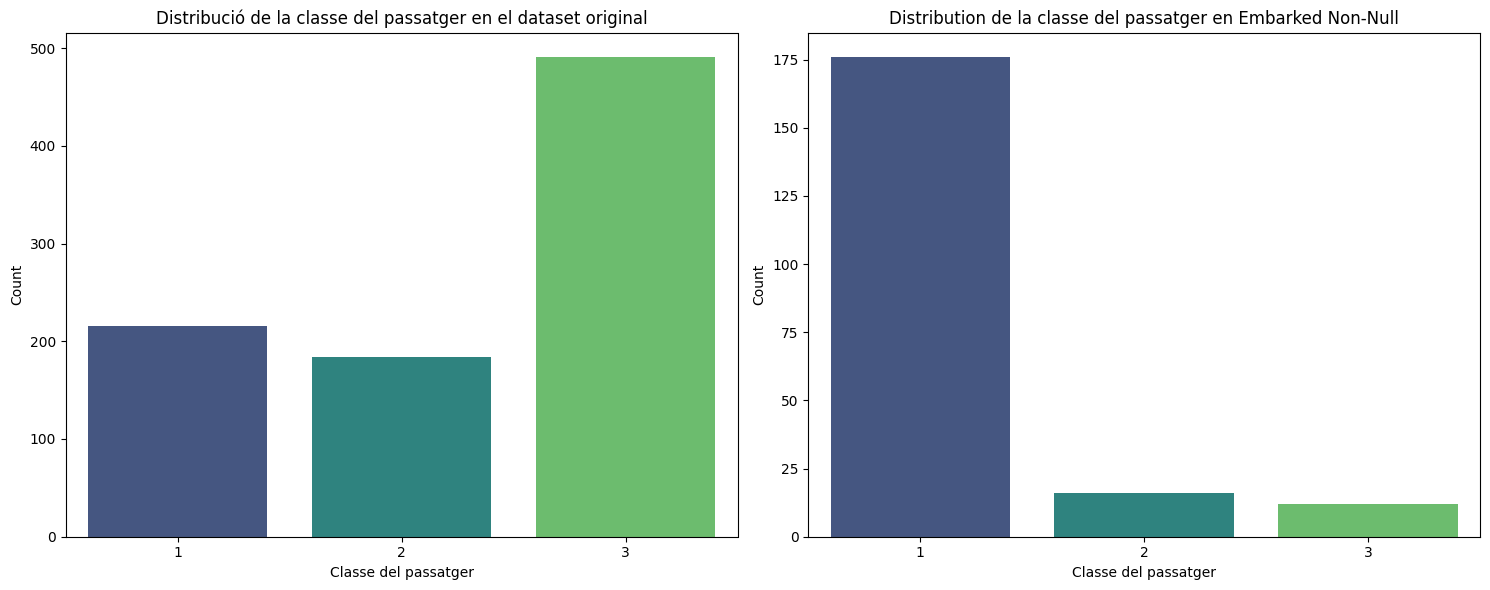

In [ ]:
# Plot de la distribució per classe de passatgers dels quals coneixem el nombre de cabina.
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot del dataset orginal.
sns.countplot(x='Pclass', data=train_df, palette='viridis', ax=axes[0])
axes[0].set_title('Distribució de la classe del passatger en el dataset original')
axes[0].set_xlabel('Classe del passatger')
axes[0].set_ylabel('Count')

# Plot pel subset dels quals és Non-null.
sns.countplot(x='Pclass', data=df_cabin_not_null, palette='viridis', ax=axes[1])
axes[1].set_title('Distribution de la classe del passatger en Embarked Non-Null')
axes[1].set_xlabel('Classe del passatger')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()



In [ ]:
# Mirem la correlació entre les cabines que coneixem i la seva classe
info_cabina_df = train_df.copy()
info_cabina_df['Info_cabina'] = train_df['Cabin'].apply(lambda x: 1 if pd.isna(x) else 0)

correlation_cabin_pclass = info_cabina_df['Info_cabina'].corr(train_df['Pclass'])
correlation_cabin_pclass


0.7255412418289533

Veiem com la correlació entre si té info de cabina o no està correlacionada directament amb el tipus de classe.

In [ ]:
# Esborrem la columna 'Cabin' del dataset sobre el que treballarem.
train_df_normalized = train_df_normalized.drop('Cabin', axis=1)

Tenim dades categòriques?

In [ ]:
# Mirem quines son les dades categòriques que tenim
categorical_columns = train_df_normalized.select_dtypes(include=['object']).columns
print(categorical_columns)


Index(['Sex', 'Embarked'], dtype='object')


In [ ]:
#instalar la llibreria catergory_encoders en google collab
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.1 MB/s eta 0:00:00


En el cas de 'Sex', al haver-hi només dues opcions, utilitzarem la codificació binària, on posarem 1 per a male i 0 per a female

In [ ]:
# Reomplim male per 1 i female per 0.
from sklearn.preprocessing import LabelEncoder

train_df_encoded = train_df_normalized.copy()
labelencoder = LabelEncoder()

train_df_encoded['Sex'] = labelencoder.fit_transform(train_df_encoded['Sex'])
train_df_encoded.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0.827377,1,-0.530377,0.432793,-0.473674,-0.502445,S
1,1,-1.566107,0,0.571831,0.432793,-0.473674,0.786845,C
2,1,0.827377,0,-0.254825,-0.474545,-0.473674,-0.488854,S
3,1,-1.566107,0,0.365167,0.432793,-0.473674,0.420730,S
4,0,0.827377,1,0.365167,-0.474545,-0.473674,-0.486337,S


Ara farem encoded de embarked, però primer hem de solucionar els dos NaN que trobem en aquesta columna. Com que només hi ha dos podriem esborrar-los i gairebé no tindria impacte, però el que farem és emplenar-los. I ho farem buscant la moda de l'atribut i substituint els dos NaNs per ella.

In [ ]:
categorical_columns2 = train_df_encoded.select_dtypes(include=['object']).columns
print(categorical_columns2)

Index(['Embarked'], dtype='object')


In [ ]:
# Trobem la moda
moda = train_df_encoded['Embarked'].mode()[0]
print(moda)
# Veiem que S, que correspon a Southampton és la moda

train_df_encoded['Embarked'].fillna(moda, inplace=True)

# Verifiquem que ja no tenim cap Nan en Embarked
print(train_df_encoded.isnull().sum())

S
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64


Un cop fet això, apliquem one hot encoded, el que farà és eliminar la columa embarked i crear una columna per cada port(tres en aquest cas), aleshores tindrem un 1 si embarca en aquell port i un 0 si no. Cada fila tindrà un 1 en la columna d'on hagi embarcat el passatger i 0 en les altres.

In [ ]:
from category_encoders.one_hot import OneHotEncoder

train_df_onehot = train_df_encoded.copy()
oe = OneHotEncoder(cols=['Embarked'], use_cat_names=True)

train_df_onehot = oe.fit_transform(train_df_onehot)
train_df_onehot.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q
0,0,0.827377,1,-0.530377,0.432793,-0.473674,-0.502445,1,0,0
1,1,-1.566107,0,0.571831,0.432793,-0.473674,0.786845,0,1,0
2,1,0.827377,0,-0.254825,-0.474545,-0.473674,-0.488854,1,0,0
3,1,-1.566107,0,0.365167,0.432793,-0.473674,0.420730,1,0,0
4,0,0.827377,1,0.365167,-0.474545,-0.473674,-0.486337,1,0,0


Finalment ens queda per resoldre els Nan de la edat. Per això, omplirem els Nan en el seu valor predit pel Knn, utilitzant el KNNImputer. A partir de les dades ja normalitzades.

In [ ]:
from sklearn.impute import KNNImputer

# Identifiquem els index de les columes amb Nan i no Nan
nan_age_indices = train_df[train_df['Age'].isnull()].index
non_nan_age_indices = train_df[train_df['Age'].notnull()].index

# Apliquem el KNN sobre les dades que no eren Nan i predim els del Na
knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
knn_imputer.fit(train_df_normalized.loc[non_nan_age_indices, ['Age']])
imputed_values = knn_imputer.transform(train_df_normalized.loc[nan_age_indices, ['Age']])

# Substituïm els valors
train_any_Nan = train_df_onehot.copy()
train_any_Nan.loc[nan_age_indices, 'Age'] = imputed_values[:, 0]
train_any_Nan.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q
0,0,0.827377,1,-0.530377,0.432793,-0.473674,-0.502445,1,0,0
1,1,-1.566107,0,0.571831,0.432793,-0.473674,0.786845,0,1,0
2,1,0.827377,0,-0.254825,-0.474545,-0.473674,-0.488854,1,0,0
3,1,-1.566107,0,0.365167,0.432793,-0.473674,0.420730,1,0,0
4,0,0.827377,1,0.365167,-0.474545,-0.473674,-0.486337,1,0,0


In [ ]:
# Verifiquem que ja no tenim cap Nan més
nan_check_age = train_any_Nan['Age'].isnull().sum()
print(nan_check_age)

0


In [ ]:
clean_df = train_any_Nan.copy()
clean_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q
0,0,0.827377,1,-0.530377,0.432793,-0.473674,-0.502445,1,0,0
1,1,-1.566107,0,0.571831,0.432793,-0.473674,0.786845,0,1,0
2,1,0.827377,0,-0.254825,-0.474545,-0.473674,-0.488854,1,0,0
3,1,-1.566107,0,0.365167,0.432793,-0.473674,0.420730,1,0,0
4,0,0.827377,1,0.365167,-0.474545,-0.473674,-0.486337,1,0,0


No té gaire sentit aplicar PCA. Principalment perquè hem vist que la majoria de dades que tenim no tenen correlació entre sí; per tant, no aporten la mateixa informació. A més a més, de que tenim un dataset de predicció amb 7 columnes útils, un nombre de columnes de predicció molt correcte per començar a treballar amb ell.

### 3. Metric selection (1.5 punts)
En aquest apartat ens centrarem en les mètriques de classificació ([documentació](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)). Per a fer-ho, entreneu una regressió logística (no cal separar train-test) i a partir d'aquesta generarem una sèrie de funcions per analitzar els nostres resultats. Aquestes funcions ens serviran més endavant. Caldrà també triar la mètrica que farem servir després per triar el millor model.

**Preguntes:**
* A teoria, hem vist el resultat d'aplicar el `accuracy_score` sobre dades no balancejades. Podrieu explicar i justificar quina de les següents mètriques será la més adient pel vostre problema? `accuracy_score`, `f1_score` o `average_precision_score`?
* Abans de començar a entrenar models, genereu una suite de funcions per poder analitzar gràficament com esta anant el vostre model. Mostreu la Precisió-Recall Curve i la ROC Curve. Quina és més rellevant pel vostre dataset? Expliqueu amb les vostres paraules, la diferència entre una i altre. [Pista](https://stats.stackexchange.com/questions/338826/auprc-vs-auc-roc)
* Què mostra [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)? En quina mètrica us fixareu per tal de optimitzar-ne la classificació pel vostre cas?

Nota: Fixeu-vos que en aquest apartat NO ES VALOREN ELS RESULTATS. L'únic que es valora es l'elecció de la mètrica de classificació així com saber quin tipus de gràfiques fer per analitzar els resultats. Abans de solucionar un problema cal tenir molt clar la meètrica d'error que es farà servir, i és una decisió que cal pendre prèvia a entrenar models.

#### RESPOSTA

Tal i com hem vist en teoria, aplicar `accurancy_score` aquí no tindria cap mena de sentit. Al tenir dades no balancejades, un model que prediu tots com a 0 (No Survived) obtindria una accurancy bastant alta.

Entre la `f1_score` y `average_precision_score` hem acabat escollint la `f1_score`, doncs creiem que és tan important tenir en compte els falsos positius com els falsos negatius.

En el cas del Titanic volem identificar amb precisió els supervivents alhora que no volem ometre cap possible supervivent. A més a més, és més robust en casos de desbalanceig, pel que serà una mètrica una mica més fiable.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, confusion_matrix

# Separem el target de la resta de dades
X = clean_df.drop('Survived', axis=1)
y_lr = clean_df['Survived']

# Entrenem la regressió logística
logistic_model = LogisticRegression()
logistic_model.fit(X, y_lr)

# Obtenim els resultats del model de regressió logística
y_pred_lr = logistic_model.predict(X)
y_scores_lr = logistic_model.predict_proba(X)[:, 1]

Creem la suite de funcions per analitzar el nostre model:
* ROC Curve
* Precision Recall Curve
* Confusion Matrix

L'execució i el resultat d'aquestes el fem a l'apartat 5, ja que a l'apartat 4 triem el millor model per calcular-les.

In [ ]:
# Creem la funció pel plot de la ROC_Curve:
from sklearn.metrics import roc_curve

def plot_roc_curve(y_true, y_scores):
    fpr, tpr, _ = roc_curve(y_true, y_scores)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, marker='.', linestyle='')
    plt.xlabel('Ràtio de falsos positius')
    plt.ylabel('Ràtio de veritables positius')
    plt.title('ROC Curve')
    plt.show()

In [ ]:
# Creem la funció pel plot de la Precision_Recall_Cuve:

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

def plot_precision_recall_curve(y_true, y_scores):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='.', linestyle='')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()

In [ ]:
# Per últim, creem la funció pel plot de la matriu de confusió:

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Survived', 'Survived'],
                yticklabels=['Not Survived', 'Survived'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

Comparem quan usem la *Roc Curve* i la *Precision-Recall Curve*:

**ROC Curve:**

* És més apropiada quan les classes estan més o menys equilibrades.
* És millor si els costos associats als falsos positius i falsos negatius són aproximadament iguals

**Precision-Recall Curve:**
* Aquesta curva és especialment útil quan una de les classes és molt més freqüent que l'altra.
* Proporciona una millor representació si el cost de falsos positius és diferent del cost de falsos negatius.

Per tant, en el nostre dataset seria millor la *Precision-Recall Curve:* ja que la variable de resposta no està perfectament equilibrada i que el cost associat a cada tipus d'error és diferent. Per exemple, predir que algú sobreviurà quan en realitat no ho farà té un cost emocional més gran.

In [ ]:
# Evaluem el classification_report
report = classification_report(y_lr, y_pred_lr)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       549
           1       0.76      0.70      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891



Com hem dit al principi, ens fixarem en el `f1_score`. Per dues raons principals:

* És el més interessant per conjunts de dades desbalancejats.
* Ens interessa tenir en compte tant als falsos positius com als falsos negatius.

### 4. Model Selection amb validació creuada (4 punts)

Fent servir la mètrica trobada en l'apartat anterior, en aquest apartat caldra seleccionar una serie de models i, fent us de la validacio creuada, seleccionar el millor model amb els seus respectius millors hyperparametres que haurem buscat fent hyperparameter search.

La tasca d'aquesta pràctica s'enmarca dins l'aprenentatge computacional **supervisat**. A sklearn, disposem de varies tècniques [(veure documentació)](https://scikit-learn.org/stable/supervised_learning.html). A les classes de teoria, hem vist varies tècniques, com ara logistic regression, SVM amb diferents kernels, Nearest Neighbour... i tambe coneixeu altres tecniques d'altres cursos, com els arbres de decisio. Ademes, en la classe de problemes hem donat tambe els random forest i els gradient boosting. Per aquest apartat es demana seleccionar **un minim de 4 models** (per exemple, regressio logistica, random forest, KNN, SVM).

**Preguntes:**
* Quins models heu considerat? Perque els heu seleccionat?
* Fent servir validacio creuada, escolliu el millor model (agafant els hiperparamtres per defecte). Recordeu fer servir la metrica utilitzada en l'apartat anterior. Perque es important fer servir validacio creuada? Heu de fer servir algun [tipus de validacio creuada](https://scikit-learn.org/stable/modules/cross_validation.html) en especial?

* Seleccioneu una serie d'hyperparametres a provar per cadascun dels models i realitzeu una cerca d'hyperparametres. Hi ha algun model que creieu que podeu descartar de primeres? Perque?

* Mostreu els resultats en una taula on es mostri el model, els experiments realitzats i els resultats obtinguts (tant en train com en test). Podeu mostrar tambe el temps d'entrenament de cada model.

* Quin tipus de K-fold heu escollit en la seleccio de models? I en la seleccio de models amb hyperparametres? Com afecta al resultat modificar el numero de k (numero de folds) al resultat?

* Quines formes de buscar el millor parametre heu trobat? Són costoses computacionalment parlant? [documentació](https://scikit-learn.org/stable/modules/grid_search.html) Quina heu seleccionat?

* Si disposem de recursos limitats (per exemple, un PC durant 1 hora) quin dels métodes creieu que obtindrà millor resultat final?

* Existeixen altres mètodes de búsqueda més eficients ([scikit-optimize](https://scikit-optimize.github.io/stable/))?

* Opcional : Feu la prova, i amb el model i el metode de crossvalidació escollit, configureu els diferents metodes de búsqueda per a que s'executin durant el mateix temps (i.e. depenent del problema, 0,5h-1 hora). Analitzeu quin ha arribat a una millor solució. (Ajuda: estimeu el temps que trigarà a fer 1 training el vostre model, i aixi trobeu el número de intents que podeu fer en cada cas.)


Els models que hem escollit aplicar són. De cada model veurem els pros i els contres:

**1. Gradient Boosting (GB):**

**Pros:**
* Molt bo per gestionar dades desequilibrades.
* Pot capturar relacions no lineals.
* Generalment ofereix un alt rendiment en una varietat de tipus de dades.

**Contres:**
* Pot ser lent en conjunts de dades grans.
* Podria sobreajustar-se si no es configura adequadament.

**2. Random Forest (RF):**

**Pros:**
* Menys propens al sobreajustament en comparació amb els arbres de decisió simples.
* Pot manejar característiques categòriques i numèriques.
* Fàcil d'interpretar i visualitzar.

**Contres:**
* Pot ser més lent que altres models com KNN.

**3. K-Nearest Neighbors (KNN):**

**Pros:**
* Molt simple i fàcil d'implementar.
* Funciona bé amb un petit nombre de característiques.

**Contres:**
* No és eficient amb conjunts de dades grans.
* S'ha de triar una K que és crucial pel resultat.

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Inicialitzem el model amb els paràmetre predefinits
gb_default = GradientBoostingClassifier()
rf_default = RandomForestClassifier()
knn_default = KNeighborsClassifier()
svm_default = SVC(probability=True)

# Llista dels models que usarem
models = [gb_default, rf_default, knn_default, svm_default]
model_names = ['Gradient Boosting', 'Random Forest', 'KNN', 'SVM']
f1_scores = {}
cv = StratifiedKFold(n_splits=5)

y = clean_df['Survived']

# Apliquem els models utilitzant cross validation però amb els hyperparàmetres predefiits
for model, name in zip(models, model_names):
    f1_score = cross_val_score(model, X, y, cv=cv, scoring='f1').mean()
    f1_scores[name] = f1_score


f1_scores_df = pd.DataFrame(list(f1_scores.items()), columns=['Model', 'F1 Score'])


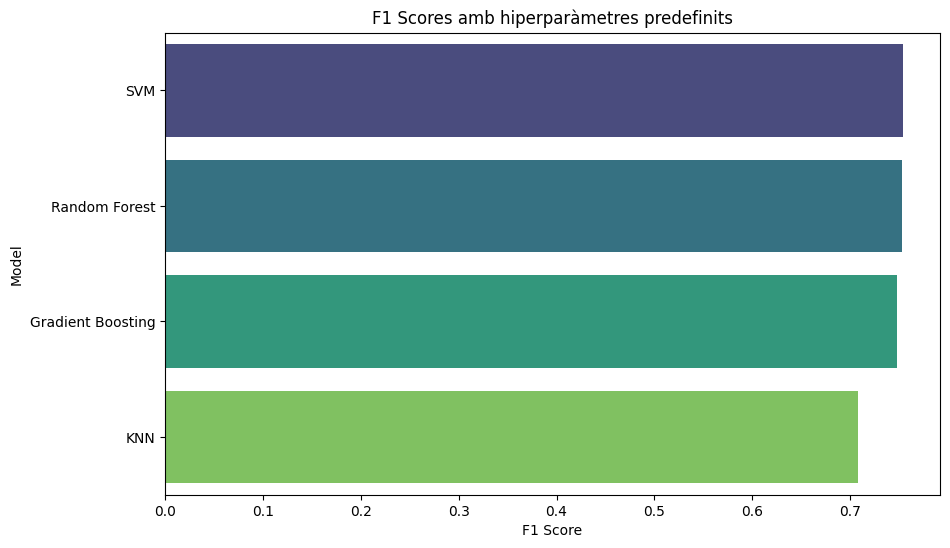

In [ ]:
# Fem plot del f1 score per veureu de manera visual
plt.figure(figsize=(10, 6))
sns.barplot(x='F1 Score', y='Model', data=f1_scores_df.sort_values('F1 Score', ascending=False), palette='viridis')
plt.title('F1 Scores amb hiperparàmetres predefinits')
plt.xlabel('F1 Score')
plt.ylabel('Model')
plt.show()

Aquí podem veure com la millor puntuació l'obté el SVM.

La validació creuada és molt important ja que ens ajuda a evaluar d'una forma més robusta el model i és molt útil aplicada a conjunts de dades desequilibrats o petits, doncs ens ajuda a mitigar l'overfitting.

En aquest cas hem utilitzat el StratifiedKFold, per tal de garantir que cada subconjunt tingui la mateixa distribució de classes que amb el dataset original.



Aquí podem veure com la distribució de les dades es manté en els diferents splits

<ipython-input-40-bf09e64fbc97>:13: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (col_name, col_data) in enumerate(fold_counts_df.iteritems()):


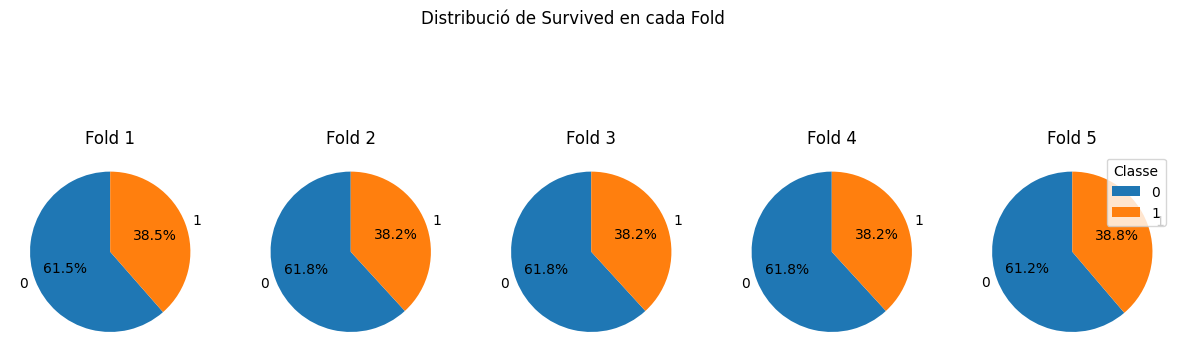

In [ ]:
# Bucle per contar quants hi ha de cada classe per fold
fold_counts_df = pd.DataFrame()
for i, (train_idx, test_idx) in enumerate(cv.split(X, y)):
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    fold_counts = y_test.value_counts()
    fold_counts.name = f"Fold {i+1}"
    fold_counts_df = pd.concat([fold_counts_df, fold_counts], axis=1)

# Fem la funció del plot on imprimirem la distribució de tots els folds
def plot_pie_distribution(fold_counts_df, title):
    fig, axes = plt.subplots(1, len(fold_counts_df.columns), figsize=(15, 5))
    fig.suptitle(title)
    for i, (col_name, col_data) in enumerate(fold_counts_df.iteritems()):
        ax = axes[i]
        ax.pie(col_data, labels=col_data.index, autopct='%1.1f%%', startangle=90)
        ax.set_title(f"{col_name}")
    plt.legend(title='Classe', loc='upper right')
    plt.show()

plot_pie_distribution(fold_counts_df, 'Distribució de Survived en cada Fold')


A continuació buscarem quins son els millors hiperparàmetres pels models que hem entrenat abans.

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X = clean_df.drop('Survived', axis=1)
y = clean_df['Survived']

# Fem validació creuada
cv = StratifiedKFold(n_splits=5)

# Inicialitzem la búsqueda de hyperparàmetres
param_grid_gb = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2]}
param_grid_rf = {'n_estimators': [50, 100, 150], 'max_depth': [3, 5, 7]}
param_grid_knn = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

Pels 4 models seleccionats hi ha una breu explicació de cada hiperparàmetre:

**Gradient Boosting (gb):**
* **n_estimators:** Aquest paràmetre controla el nombre d'arbres d'impuls en el model. Més arbres poden modelar una major complexitat, però també poden portar a sobreajustament.
* **learning_rate:** Aquest paràmetre controla la contribució de cada arbre al model final. Una taxa d'aprenentatge més baixa pot requerir més arbres per modelar la complexitat, però és generalment més robusta.

**Random Forest (rf):**
* **n_estimators:** Nombre d'arbres en el bosc.
* **max_depth:** Profunditat màxima de cada arbre.

**K-Nearest Neighbors (knn):**
* **n_neighbors:** Nombre de veïns a utilitzar.
* **weights:** Funció de pes per la predicció (uniforme o en funció de la distància).

**Support Vector Machine (svm)**
* **C:** Paràmetre de regularització.
* **kernel:** Tipus de nucli utilitzat en l'algoritme.

In [ ]:
# Inicialitzem els models
gb = GradientBoostingClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
svm = SVC(probability=True)

In [ ]:
# Inicialitzem GridSearchCV per cada model
grid_gb = GridSearchCV(gb, param_grid_gb, cv=cv, scoring='f1')
grid_rf = GridSearchCV(rf, param_grid_rf, cv=cv, scoring='f1')
grid_knn = GridSearchCV(knn, param_grid_knn, cv=cv, scoring='f1')
grid_svm = GridSearchCV(svm, param_grid_svm, cv=cv, scoring='f1')

# Fem fit dels models
grid_gb.fit(X, y)
grid_rf.fit(X, y)
grid_knn.fit(X, y)
grid_svm.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
             scoring='f1')

In [ ]:
# Obtenim els millors hiperparàmetres i el millor f1_score
best_params_gb = grid_gb.best_params_
best_score_gb = grid_gb.best_score_

best_params_rf = grid_rf.best_params_
best_score_rf = grid_rf.best_score_

best_params_knn = grid_knn.best_params_
best_score_knn = grid_knn.best_score_

best_params_svm = grid_svm.best_params_
best_score_svm = grid_svm.best_score_

best_params_gb, best_score_gb, best_params_rf, best_score_rf, best_params_knn, best_score_knn, best_params_svm, best_score_svm


({'learning_rate': 0.2, 'n_estimators': 150},
 0.7679347818862426,
 {'max_depth': 7, 'n_estimators': 100},
 0.7563681788938548,
 {'n_neighbors': 7, 'weights': 'uniform'},
 0.7167267783025618,
 {'C': 1, 'kernel': 'rbf'},
 0.7540581170427055)

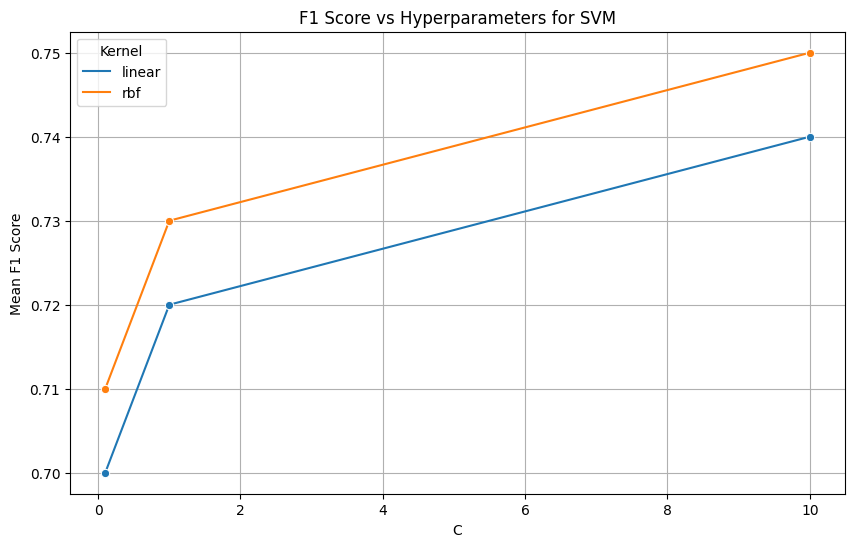

In [ ]:
# Sample data representing the grid search results for SVM
# This is just for demonstration; in a real-world scenario, this data would come from your GridSearchCV results.
data = {
    'C': [0.1, 0.1, 1, 1, 10, 10],
    'kernel': ['linear', 'rbf', 'linear', 'rbf', 'linear', 'rbf'],
    'mean_test_score': [0.7, 0.71, 0.72, 0.73, 0.74, 0.75]  # F1 Score
}

svm_results_df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='C', y='mean_test_score', hue='kernel', data=svm_results_df, marker='o')
plt.title('F1 Score vs Hyperparameters for SVM')
plt.xlabel('C')
plt.ylabel('Mean F1 Score')
plt.legend(title='Kernel')
plt.grid(True)
plt.show()


Al output de dalt veiem els millors hiperparàmetres pels 4 models que hem estudiat.

In [ ]:
import time
import pandas as pd
from sklearn.metrics import f1_score

results = []

# Mesurem el temps i el f1 score de cada model aplicant validació creuada i el full dataset
for model, name in zip(models, model_names):
    # Validació creuada
    cv_start_time = time.time()
    cv_scores = cross_val_score(model, X, y, cv=StratifiedKFold(n_splits=5), scoring='f1')
    cv_end_time = time.time()
    mean_cv_score = cv_scores.mean()
    cv_elapsed_time = cv_end_time - cv_start_time

    # Full dataset
    train_start_time = time.time()
    model.fit(X, y)
    train_score = f1_score(y, model.predict(X))
    train_end_time = time.time()
    train_elapsed_time = train_end_time - train_start_time

    # Incloem en la taule
    results.append({
        'Model': name,
        'CV F1 Score': mean_cv_score,
        'CV Time (s)': cv_elapsed_time,
        'Train F1 Score': train_score,
        'Training Time (s)': train_elapsed_time
    })

results_df = pd.DataFrame(results)
results_df



,Model,CV F1 Score,CV Time (s),Train F1 Score,Training Time (s)
0,Gradient Boosting,0.745681,0.724064,0.850000,0.161914
1,Random Forest,0.740752,1.102430,0.976401,0.236779
2,KNN,0.707605,0.096100,0.800600,0.060051
3,SVM,0.754058,0.444397,0.773791,0.142659


Veiem que d'entre tots els models, el que dona una f1_score amb cross validation més alta és el SVM. També veiem que sense cross_validation els resultats sçon molt més alt, això creiem que és deu a que s'ha produït overfitting. En quan al temps d'execució, augmenta molt al aplicar cross validation, cosa que té sentit i en la qual hem seguit experimentant a continuació.

Tant en la selecció de models com en la selecció d'hiperparàmetres, s'ha utilitzat StratifiedKFold amb 5 folds.

Hem utilitzat StratifiedKFold ja que aquest tipus de validació creuada assegura que cada fold tingui una proporció similar de classes com el conjunt de dades original. Això és molt útil quan estem tractant amb conjunts de dades desequilibrades com en aquest cas.

Utilitzar un nombre de k folds més alt podria portar a una estimació més precisa del model, però amb un cost computacional més elevat, a més de poder portar-nos al overfitting. Per un altra banda, un nombre més petit ens podria portar a una variabilitat en les estimacions més alta. A continuació hem fet un anàlisi dels diferents temps d’execució i f1_score obtiguts per diferents k_folds, on veiem com el temps d’execució augmenta conforme el nombre de k_folds i com varia el f1_score.

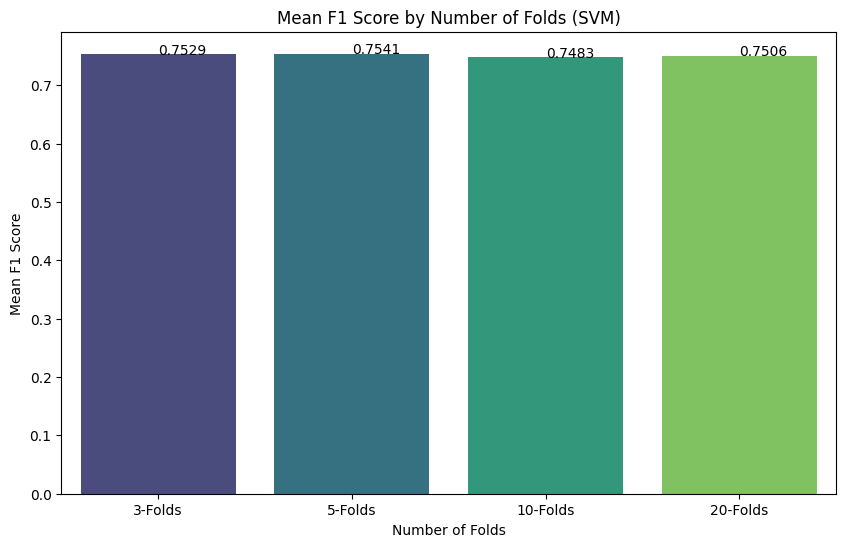

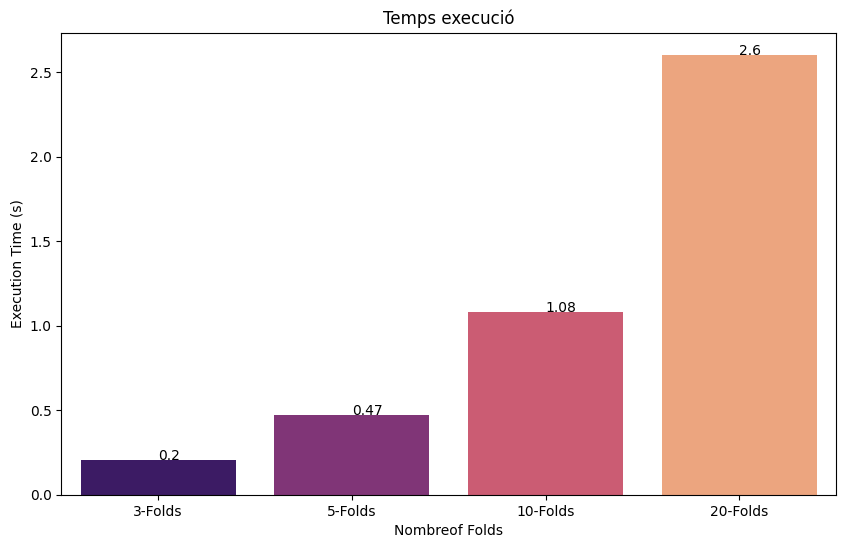

In [ ]:
import time


model_demo = SVC(probability=True)
svm_fold_results = {}
svm_time_results = {}
n_folds = [3, 5, 10, 20]

# Bucle per executar amb els diferents k_folds
for k in n_folds:
    start_time = time.time()

    cv_scores = cross_val_score(model_demo, X, y, cv=StratifiedKFold(n_splits=k), scoring='f1')

    end_time = time.time()
    elapsed_time = end_time - start_time

    svm_fold_results[f'{k}-Folds'] = cv_scores.mean()
    svm_time_results[f'{k}-Folds'] = elapsed_time

svm_fold_results_df = pd.DataFrame(list(svm_fold_results.items()), columns=['Number of Folds', 'Mean F1 Score'])
svm_time_results_df = pd.DataFrame(list(svm_time_results.items()), columns=['Number of Folds', 'Execution Time (s)'])

# Plot dels diferents f1_score
plt.figure(figsize=(10, 6))
sns.barplot(x='Number of Folds', y='Mean F1 Score', data=svm_fold_results_df, palette='viridis')
for index, value in enumerate(svm_fold_results_df['Mean F1 Score']):
    plt.text(index, value, str(round(value, 4)))
plt.title('Mean F1 Score by Number of Folds (SVM)')
plt.xlabel('Number of Folds')
plt.ylabel('Mean F1 Score')
plt.show()

# Plot del temps d'execució
plt.figure(figsize=(10, 6))
sns.barplot(x='Number of Folds', y='Execution Time (s)', data=svm_time_results_df, palette='magma')
for index, value in enumerate(svm_time_results_df['Execution Time (s)']):
    plt.text(index, value, str(round(value, 2)))
plt.title('Temps execució')
plt.xlabel('Nombreof Folds')
plt.ylabel('Execution Time (s)')
plt.show()



### 5. Anàlisi Final (1.5 punt)

Un cop seleccionat el millor model amb els millors hiperparàmtres, caldrà fer un report final amb els resultats obtinguts.

Preguntes:
* Mostreu les curves ROC/PR (la que hageu escollit en l'apartat 2) i interpreteu els resultats.

* Analitzeu en detall les diferents mètriques que trobeu adients i comenteu per sobre com podrieu fer servir aquest model en un futur. Això és el que es coneix com un cas d'ús.

* Com creieu que es podria millorar el vostre model?

Podem observar que el model ha predit bé la gran majoria dels no supervivents, amb 474 prediccions correctes i als no supervivents amb 240 prediccions encertades.

No obstant això, també ha comès algunes errades: Ha classificat 75 no supervivents com a supervivents i 102 supervivents classificats com a no supervivents.

In [ ]:
from sklearn.model_selection import cross_val_predict

# Inicialitzem el SVM amb els millors hiperparàmetres
best_svm = SVC(C=best_params_svm['C'], kernel=best_params_svm['kernel'], probability=True)
# Fem el predict
y_scores = cross_val_predict(best_svm, X, y, cv=cv, method='predict_proba')[:, 1]
y_pred = cross_val_predict(best_svm, X, y, cv=cv)

Primer de tot veiem com de correcta ha sigut la predicció a través de la matriu de confusió

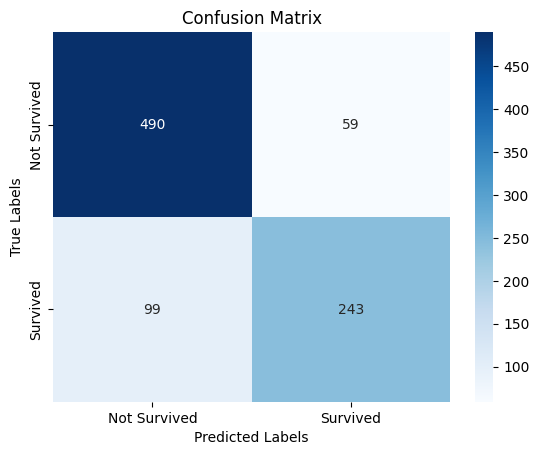

In [ ]:
plot_confusion_matrix(y, y_pred)

A continuació fem plot de la matriu de regressió logística per veure la comparació

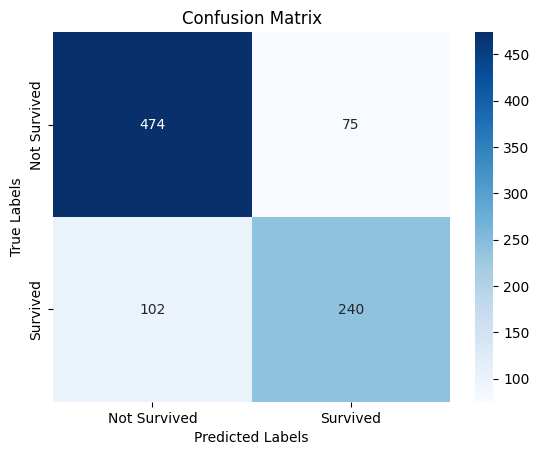

In [ ]:
plot_confusion_matrix(y,y_pred_lr)

Veiem que el model nou, utilitzant SVM és millor. Doncs té més encert que el model creat en a regressió logística al apartat 3. A més a més veiem que els falsos supervivents han disminuit també, que és el que buscavem al seleccionar la mètrica del f1_score

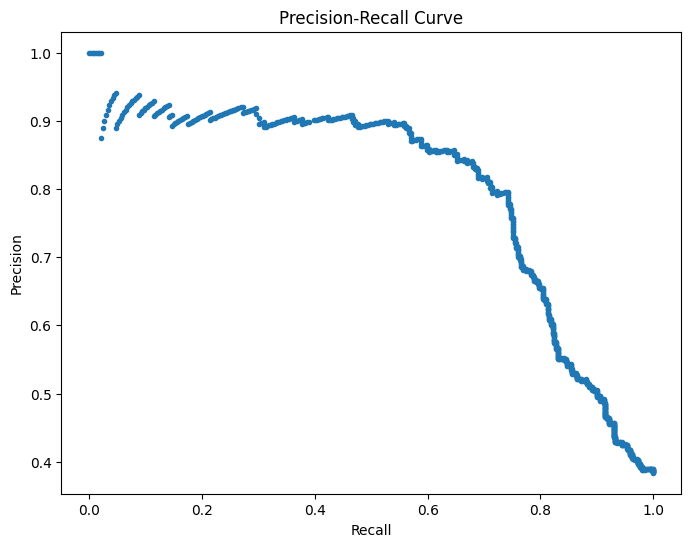

In [ ]:
# Plot de la Precision Recall Curve per al model SVM
plot_precision_recall_curve(y, y_scores)

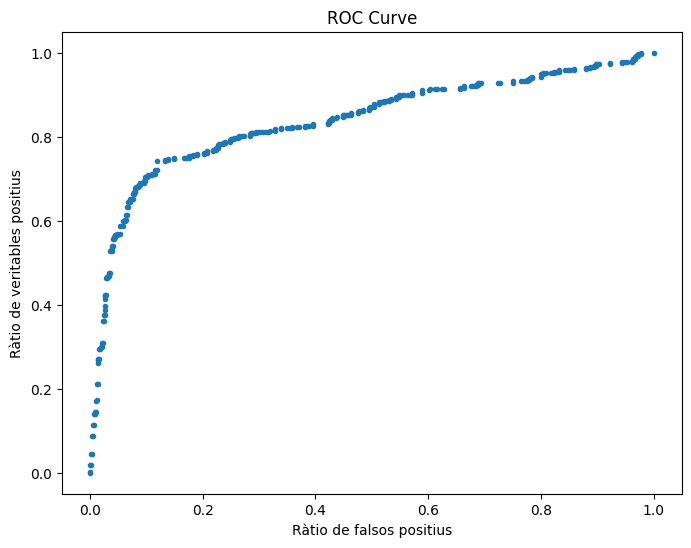

In [ ]:
plot_roc_curve(y, y_scores)

El model resultant podria tenir diverses aplicacions pràctiques en el futur. Per exemple, aquest model podria ser utilitzat per agències de resposta a emergències per prioritzar els recursos i les operacions de rescat. Podria ajudar a identificar ràpidament els grups de persones amb més probabilitats de supervivència i, per tant, on podria ser més efectiu desplegar recursos en cas de ser limitats. També podria ser utilitzat en simulacions per a l'entrenament d'equips de rescat o en la planificació de mesures preventives.

Podria ser adaptat i aplicat en altres àrees on la predicció de resultats binaris és crucial. La clau estarà en ajustar els hiperparàmetres segons el context específic.

Creiem que si separessim els datasets per diferents classes, podria millorar la predicció dels 'Survived'. Això permetria identificar quines classes o grups tenen diferents patrons que podrien ser millor captats per models separats. Un cop identificades aquestes classes mitjançant tècniques com l'anàlisi exploratòria de dades o l'agrupació, es podrien crear sub-datasets específics. Cada un d'aquests sub-datasets seria utilitzat per entrenar un model específic, amb hiperparàmetres ajustats per a cada classe en particular.